In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

df = pd.read_csv("HW1_CarPrice.csv", header=0)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 0, 'Price')

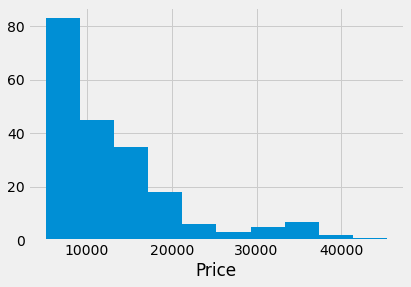

In [3]:
# 直方圖
plt.hist(df['price'])
plt.xlabel('Price')

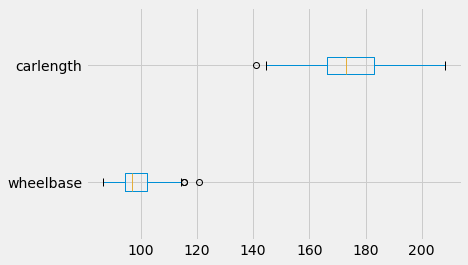

In [4]:
# 箱型圖
df.loc[:, 'wheelbase':'carlength'].boxplot(vert=False);

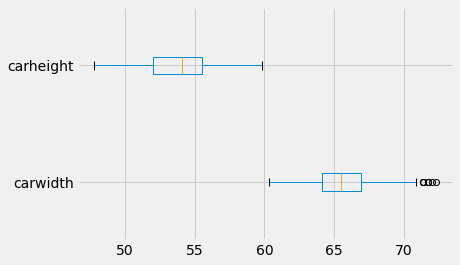

In [5]:
df.loc[:, 'carwidth':'carheight'].boxplot(vert=False);

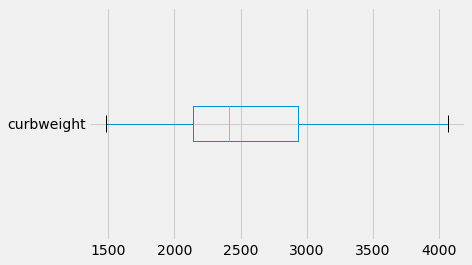

In [6]:
df.loc[:, ['curbweight']].boxplot(vert=False);

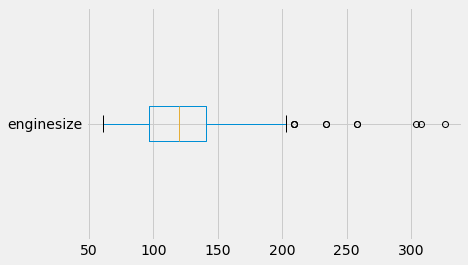

In [7]:
df.loc[:, ['enginesize']].boxplot(vert=False);

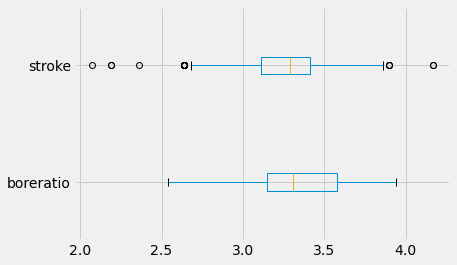

In [8]:
df.loc[:, 'boreratio':'stroke'].boxplot(vert=False);

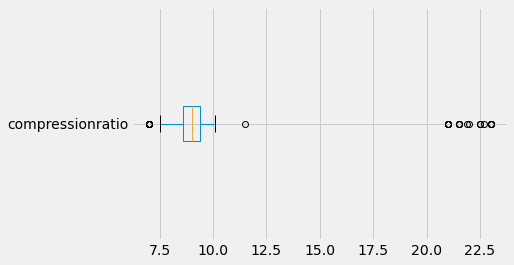

In [9]:
df.loc[:, ['compressionratio']].boxplot(vert=False);

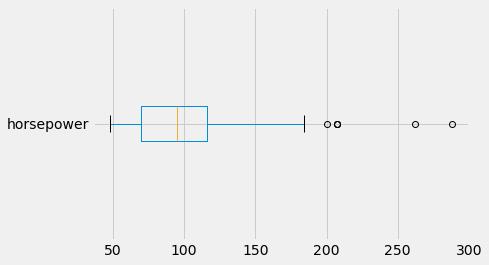

In [10]:
df.loc[:, ['horsepower']].boxplot(vert=False);

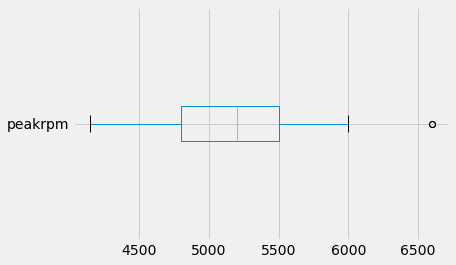

In [11]:
df.loc[:, ['peakrpm']].boxplot(vert=False);

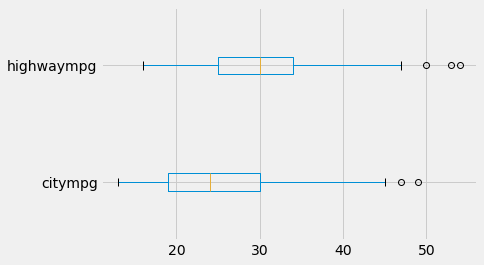

In [12]:
df.loc[:, 'citympg':'highwaympg'].boxplot(vert=False);

In [13]:
df.loc[:, 'wheelbase':'price'].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


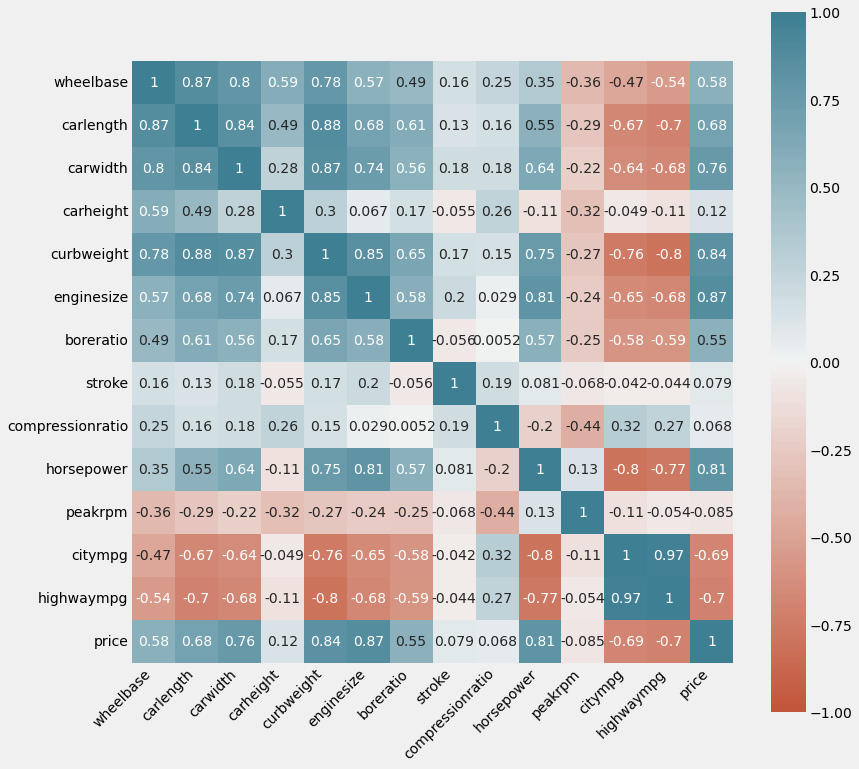

In [14]:
corr = df.loc[:, 'wheelbase':'price'].corr()
plt.figure(figsize=(12, 12)) # 調整圖片大小

ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0, 0.5, 'Price')

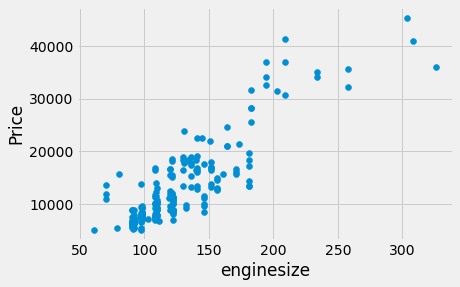

In [15]:
# 散布圖
plt.scatter(df['enginesize'], df['price'], marker='o')
plt.xlabel('enginesize')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

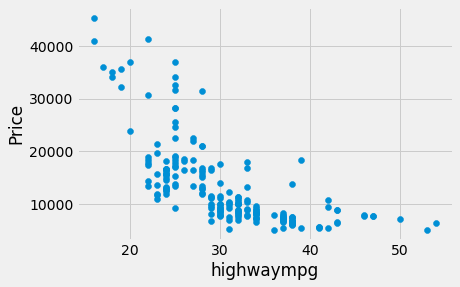

In [16]:
plt.scatter(df['highwaympg'], df['price'], marker='o')
plt.xlabel('highwaympg')
plt.ylabel('Price')

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = df.loc[:, ['enginesize', 'highwaympg']], df.loc[:, ['price']]

# 建立縮放器(四分位數)
scaleX = RobustScaler().fit(X)
X = scaleX.transform(X)

# 最大最小縮放區間改為 [1, 5]
y = MinMaxScaler(feature_range=[1, 5]).fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (164, 2)
X_test: (41, 2)
y_train: (164, 1)
y_test: (41, 1)


In [18]:
from sklearn.metrics import mean_squared_error

print('MSE(training): %.3f, MSE(testing): %.3f' %(
    mean_squared_error(y_train, y_train_pred), 
    mean_squared_error(y_test, y_test_pred)))

MSE(training): 0.128, MSE(testing): 0.166


In [19]:
print('RMSE(training): %.3f, RMSE(testing): %.3f' %(
    mean_squared_error(y_train, y_train_pred, squared=False), 
    mean_squared_error(y_test, y_test_pred, squared=False)))

RMSE(training): 0.357, RMSE(testing): 0.407


In [20]:
from sklearn.metrics import mean_absolute_error

print('MAE(training): %.3f, MAE(testing): %.3f' %(
    mean_absolute_error(y_train, y_train_pred), 
    mean_absolute_error(y_test, y_test_pred)))

MAE(training): 0.259, MAE(testing): 0.305


In [21]:
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE(training): %.3f, MAPE(testing): %.3f' %(
    mean_absolute_percentage_error(y_train, y_train_pred), 
    mean_absolute_percentage_error(y_test, y_test_pred)))

MAPE(training): 0.138, MAPE(testing): 0.167


In [22]:
from sklearn.metrics import r2_score

print('R^2(training): %.3f, R^2(testing): %.3f' %(
    r2_score(y_train, y_train_pred), 
    r2_score(y_test, y_test_pred)))

R^2(training): 0.784, R^2(testing): 0.783


Text(0, 0.5, 'Residual (standardization)')

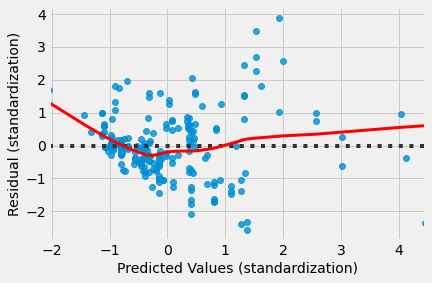

In [23]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X).fit()

df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], 
              lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)

C:\Users\winni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\winni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

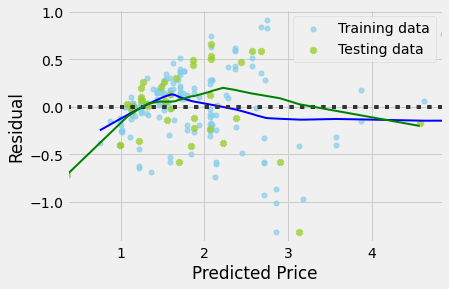

In [24]:
y_train_resid = y_train_pred - y_train
y_test_resid = y_test_pred - y_test

sns.residplot(y_train_pred, y_train_resid, lowess=True, 
              color="skyblue", label='Training data', 
              scatter_kws={'s': 25, 'alpha':0.7}, 
              line_kws={'color': 'b', 'lw':2})
sns.residplot(y_test_pred, y_test_resid, lowess=True, 
              color="yellowgreen", label='Testing data', 
              scatter_kws={'s': 25, 'marker':'x'}, 
              line_kws={'color': 'g', 'lw':2})
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residual')

In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = df.loc[:, ['enginesize', 'highwaympg']], df.loc[:, ['price']]

# 建立縮放器(四分位數)
scaleX = RobustScaler().fit(X)
X = scaleX.transform(X)

# 最大最小縮放區間改為 [1, 5]
y = MinMaxScaler(feature_range=[1, 5]).fit_transform(y)

pol_d = PolynomialFeatures(degree=2)
X_poly = pol_d.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                    test_size=0.2,
                                                    random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (164, 6)
X_test: (41, 6)
y_train: (164, 1)
y_test: (41, 1)


In [26]:
from sklearn.metrics import mean_squared_error

print('MSE(training): %.3f, MSE(testing): %.3f' %(
    mean_squared_error(y_train, y_train_pred), 
    mean_squared_error(y_test, y_test_pred)))

MSE(training): 0.118, MSE(testing): 0.143


In [27]:
print('RMSE(training): %.3f, RMSE(testing): %.3f' %(
    mean_squared_error(y_train, y_train_pred, squared=False), 
    mean_squared_error(y_test, y_test_pred, squared=False)))

RMSE(training): 0.344, RMSE(testing): 0.378


In [28]:
from sklearn.metrics import mean_absolute_error

print('MAE(training): %.3f, MAE(testing): %.3f' %(
    mean_absolute_error(y_train, y_train_pred), 
    mean_absolute_error(y_test, y_test_pred)))

MAE(training): 0.244, MAE(testing): 0.269


In [29]:
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE(training): %.3f, MAPE(testing): %.3f' %(
    mean_absolute_percentage_error(y_train, y_train_pred), 
    mean_absolute_percentage_error(y_test, y_test_pred)))

MAPE(training): 0.129, MAPE(testing): 0.139


In [30]:
from sklearn.metrics import r2_score

def adj_r2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

print('R^2(training): %.3f, R^2(testing): %.3f' %(
    adj_r2(r2_score(y_train, y_train_pred), X.shape[0], X.shape[1]), 
    adj_r2(r2_score(y_test, y_test_pred), X.shape[0], X.shape[1])))

R^2(training): 0.798, R^2(testing): 0.811


Text(0, 0.5, 'Residual (standardization)')

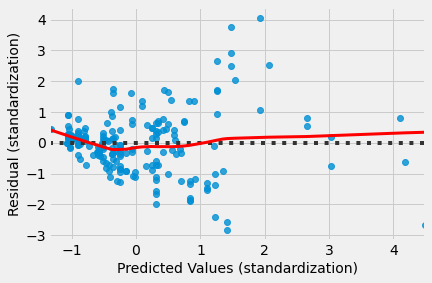

In [31]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

X = sm.add_constant(X_poly)  # 增加常數行作為截距項
model = sm.OLS(y, X).fit()

df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], 
              lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)

C:\Users\winni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\winni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

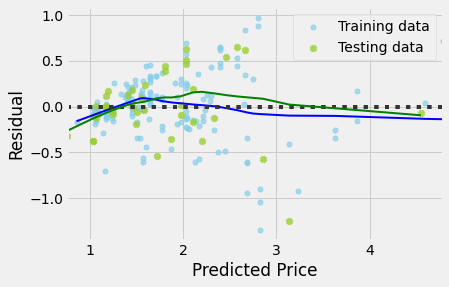

In [32]:
y_train_resid = y_train_pred - y_train
y_test_resid = y_test_pred - y_test 

sns.residplot(y_train_pred, y_train_resid, lowess=True, 
              color="skyblue", label='Training data', 
              scatter_kws={'s': 25, 'alpha':0.7}, 
              line_kws={'color': 'b', 'lw':2})
sns.residplot(y_test_pred, y_test_resid, lowess=True, 
              color="yellowgreen", label='Testing data', 
              scatter_kws={'s': 25, 'marker':'x'}, 
              line_kws={'color': 'g', 'lw':2})
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residual')